In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

# Use Keras API

In [3]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Coat'

In [7]:
# build the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
# equivalent way by passing all layers during creation
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation='relu'), 
keras.layers.Dense(100, activation='relu'), 
keras.layers.Dense(10, activation='softmax')])
#keras.utils.plot_model(model)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) #sparse categorical because we have sparse labels (only the index of the class, rather than a one-hot encoding)

## training and evaluating the model

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 20s 11ms/step - loss: 0.7162 - accuracy: 0.7629 - val_loss: 0.5071 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4886 - accuracy: 0.8282 - val_loss: 0.4443 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4441 - accuracy: 0.8453 - val_loss: 0.4208 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4169 - accuracy: 0.8534 - val_loss: 0.4079 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3963 - accuracy: 0.8609 - val_loss: 0.3889 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3799 - accuracy: 0.8663 - val_loss: 0.3782 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3652 - accuracy: 0.8717 - val_loss: 0.3635 - val

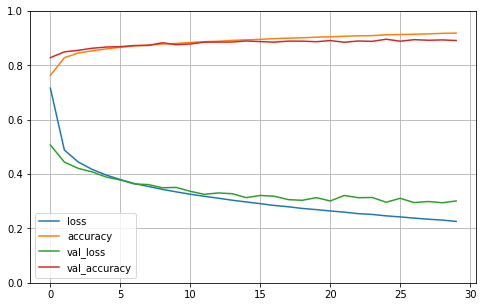

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3419 - accuracy: 0.8769


[0.3418567180633545, 0.8769000172615051]

In [13]:
# try out some predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [14]:
y_pred = np.argmax(y_proba, axis=-1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


(11610, 8)

In [16]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0001 - val_loss: 2.8272
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7897 - val_loss: 0.4443
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4343 - val_loss: 0.4015
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4093 - val_loss: 0.3943
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3974 - val_loss: 0.3820
Epoch 6/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3895 - val_loss: 0.3764
Epoch 7/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3849 - val_loss: 0.3770
Epoch 8/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3825 - val_loss: 0.3647
Epoch 9/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3775 - val_loss: 0.3639
Epoch 10/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3757 - val_loss: 0.3817

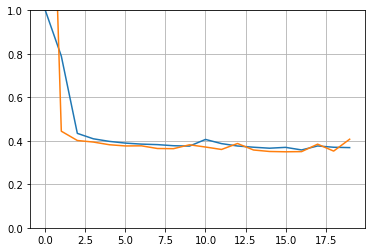

In [17]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Wide and Deep Neural Network with Functional API

In [19]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [22]:
# compile
model.compile(loss='mean_squared_error', optimizer='sgd')

# train
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# evaluate
mse_test = model.evaluate(X_test, y_test)


# predict

X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 5s 9ms/step - loss: 0.8858 - val_loss: 66.2182
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 1.6051 - val_loss: 18.2158
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 1.8875 - val_loss: 14.8827
Epoch 4/20
363/363 [==============================] - 3s 8ms/step - loss: 0.5693 - val_loss: 19.4519
Epoch 5/20
363/363 [==============================] - 3s 8ms/step - loss: 4.3684 - val_loss: 5.0924
Epoch 6/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5710 - val_loss: 21.1288
Epoch 7/20
363/363 [==============================] - 3s 8ms/step - loss: 1.4452 - val_loss: 147.5084
Epoch 8/20
363/363 [==============================] - 3s 8ms/step - loss: 14.7186 - val_loss: 95.1792
Epoch 9/20
363/363 [==============================] - 3s 8ms/step - loss: 22.1840 - val_loss: 4690.5713
Epoch 10/20
363/363 [==============================] - 3s 8ms/step - loss: 335.8856 - v

### that training diverged. 

# use multiple inputs instead

In [28]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [25]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 5s 10ms/step - loss: 1.8469 - val_loss: 1.0086
Epoch 2/20
363/363 [==============================] - 3s 9ms/step - loss: 0.8599 - val_loss: 0.7901
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 0.7374 - val_loss: 0.7115
Epoch 4/20
363/363 [==============================] - 3s 9ms/step - loss: 0.6773 - val_loss: 0.6598
Epoch 5/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6373 - val_loss: 0.6278
Epoch 6/20
363/363 [==============================] - 3s 9ms/step - loss: 0.6071 - val_loss: 0.6020
Epoch 7/20
363/363 [==============================] - 3s 9ms/step - loss: 0.5824 - val_loss: 0.5788
Epoch 8/20
363/363 [==============================] - 3s 9ms/step - loss: 0.5613 - val_loss: 0.5603
Epoch 9/20
363/363 [==============================] - 3s 9ms/step - loss: 0.5435 - val_loss: 0.5442
Epoch 10/20
363/363 [==============================] - 3s 8ms/step - loss: 0.5276 - val_loss: 0.530

In [26]:
# same model, but with auxiliary output for the deep part
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='auxiliary_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

# multiple outputs means multiple loss functions - and weights for them!
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 7s 12ms/step - loss: 1.0148 - main_output_loss: 0.9181 - auxiliary_output_loss: 1.8850 - val_loss: 2.6129 - val_main_output_loss: 2.7408 - val_auxiliary_output_loss: 1.4618
Epoch 2/20
363/363 [==============================] - 3s 10ms/step - loss: 0.7309 - main_output_loss: 0.6861 - auxiliary_output_loss: 1.1335 - val_loss: 6.2022 - val_main_output_loss: 6.7279 - val_auxiliary_output_loss: 1.4709
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 1.0403 - main_output_loss: 1.0309 - auxiliary_output_loss: 1.1245 - val_loss: 0.5521 - val_main_output_loss: 0.4952 - val_auxiliary_output_loss: 1.0648
Epoch 4/20
363/363 [==============================] - 4s 10ms/step - loss: 0.4813 - main_output_loss: 0.4361 - auxiliary_output_loss: 0.8887 - val_loss: 0.4763 - val_main_output_loss: 0.4355 - val_auxiliary_output_loss: 0.8436
Epoch 5/20
363/363 [==============================] - 4s 10ms/step - loss: 0.4507 - main_outp

# same model using subclassing API

In [27]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # handles standard args
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output




# Saving and Restoring a model

In [ ]:
# model.save(my_name)
# model = keras.models.load_model(my_name)

# Callbacks

In [ ]:
# build and compile model again
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='auxiliary_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

# multiple outputs means multiple loss functions - and weights for them!
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

# callback, crude implementation of early stopping
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), callbacks=[checkpoint_cb])



In [ ]:
# use the official early stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
# build a custom callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))